<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Dvara_Research_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('merged_data.csv')

In [3]:
df.head()

,Sector,State,HHID,weight,Household size,religion,Social group,Household type,Value (Rs.)-Cash,Current A/c,...,Bullion & Ornaments,Life Insurance,Receivables,Risky Assets,Land & Building,Other Assets,Serial no.,credit agency,purpose of loan,amount (Rs.) outstanding (including interest) as on 30.06.2018
0,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,51,18,12,
1,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,99,,,0
2,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,51,18,10,5000
3,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,99,,,5000
4,1,Jammu & Kashmir,53335502,310.0,1,Islam,Other,1,3000,0,...,0,0,0,0,992500,29060,51,18,12,3500


In [4]:
df.shape

(178971, 29)

In [5]:
column_name_mapping = {
    'Household size': 'HH_size',
    'Social group ': 'Social_group',
    'Household type': 'HH_type',
    'Value (Rs.)-Cash':'Val_cash',
    'Current A/c': 'Current_A/C',
    'Savings A/c':'Savings_A/c',
    'FD A/c': 'FD_A/c',
    'Post Office A/c':'Post_Office_A/c',
    'Small Savings A/c':'Small_Savings_A/c',
    'Coop. Bank A/c':'Coop_Bank_A/c',
    'NBFC A/c':'NBFC_A/c',
    'SHG/JLG/CCS A/c':'SHG/JLG/CCS_A/c',
    'PF A/c':'PF_A/c',
    'Pension A/c':'Pension_A/c',
    'Bullion & Ornaments':'Bullion/Ornaments',
    'Life Insurance':'Life_Insurance',
    'Risky Assets':'Risky_Assets',
    'Land & Building':'Land/Building',
    'Other Assets':'Other_Assets',
    'Serial no.':'Serial_no',
    'credit agency':'credit_agency',
    'purpose of loan':'purpose_of_loan',
    'amount (Rs.) outstanding (including interest) as on 30.06.2018 ':'outstanding_amount',
}
# Rename columns using the defined mapping
df.rename(columns=column_name_mapping, inplace=True)

In [6]:
df.fillna(0).replace('', 0)

,Sector,State,HHID,weight,HH_size,religion,Social_group,HH_type,Val_cash,Current_A/C,...,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount
0,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,51,18,12,
1,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,99,,,0
2,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,51,18,10,5000
3,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,99,,,5000
4,1,Jammu & Kashmir,53335502,310.0,1,Islam,Other,1,3000,0,...,0,0,0,0,992500,29060,51,18,12,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178966,2,Telangana,76272501,935.0,2,Islam,OBC,1,9500,0,...,62500,0,15000,0,2080000,15000,51,16,06,198500
178967,2,Telangana,76272501,935.0,2,Islam,OBC,1,9500,0,...,62500,0,15000,0,2080000,15000,52,16,06,262500
178968,2,Telangana,76272501,935.0,2,Islam,OBC,1,9500,0,...,62500,0,15000,0,2080000,15000,99,,,461000
178969,2,Telangana,76272502,935.0,5,Hinduism,Other,1,15500,0,...,240200,200000,200000,0,2555000,29500,51,16,08,


In [7]:
df.describe()

,Sector,HHID,weight,HH_size,HH_type,Val_cash,Current_A/C,Savings_A/c,FD_A/c,Post_Office_A/c,...,SHG/JLG/CCS_A/c,PF_A/c,Pension_A/c,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no
count,178971.000000,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,...,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,178971.000000
mean,1.384297,6.219726e+07,1595.086929,4.525063,2.446195,4.167685e+03,4.312092e+03,2.669937e+04,6.820860e+03,1.834829e+03,...,1.506403e+03,2.685068e+04,4.858032e+03,7.590993e+04,1.076277e+05,3.307865e+03,2.699755e+03,2.417837e+06,1.280942e+05,53.333205
std,0.486430,9.781287e+06,2820.518394,2.136249,2.013674,1.388502e+04,9.994550e+04,1.183214e+05,1.305352e+05,2.588659e+04,...,1.850125e+04,2.084543e+05,7.222884e+04,1.528223e+05,1.067982e+06,1.550991e+05,2.015998e+05,8.376181e+06,5.624540e+05,42.352399
min,1.000000,5.003010e+07,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000
25%,1.000000,5.427550e+07,190.500000,3.000000,1.000000,7.500000e+02,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,8.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.126000e+05,4.600000e+03,1.000000
50%,1.000000,5.734640e+07,514.250000,4.000000,2.000000,2.000000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+05,3.500000e+04,51.000000
75%,2.000000,7.187710e+07,1707.750000,5.000000,3.000000,4.400000e+03,0.000000e+00,1.800000e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+06,8.999000e+04,99.000000
max,2.000000,7.999950e+07,49858.500000,30.000000,9.000000,2.100000e+06,1.135000e+07,9.400000e+06,1.930000e+07,4.300000e+06,...,3.095000e+06,2.000000e+07,9.360000e+06,9.000000e+06,2.500000e+08,2.500000e+07,5.000000e+07,1.147950e+09,6.777500e+07,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178971 entries, 0 to 178970
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Sector              178971 non-null  int64  
 1   State               178971 non-null  object 
 2   HHID                178971 non-null  int64  
 3   weight              178971 non-null  float64
 4   HH_size             178971 non-null  int64  
 5   religion            178971 non-null  object 
 6   Social_group        178971 non-null  object 
 7   HH_type             178971 non-null  int64  
 8   Val_cash            178971 non-null  int64  
 9   Current_A/C         178971 non-null  int64  
 10  Savings_A/c         178971 non-null  int64  
 11  FD_A/c              178971 non-null  int64  
 12  Post_Office_A/c     178971 non-null  int64  
 13  Small_Savings_A/c   178971 non-null  int64  
 14  Coop_Bank_A/c       178971 non-null  int64  
 15  NBFC_A/c            178971 non-nul

In [83]:
# columns_to_convert = ['credit_agency', 'purpose_of_loan','outstanding_amount']
# # Convert non-finite values to NaN
# df[columns_to_convert] = df[columns_to_convert].replace([pd.NA, pd.NaT, float('inf'), float('-inf')], pd.NA)

# # Convert the columns to integer type
# df[columns_to_convert] = df[columns_to_convert].astype('Int64', errors='ignore')

In [35]:
columns_to_convert = ['credit_agency', 'purpose_of_loan', 'outstanding_amount']

# Clean non-numeric values by replacing empty strings and non-numeric values with NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert the columns to integer type
df[columns_to_convert] = df[columns_to_convert].astype('Int64')

In [36]:
df.isnull().sum()

Sector                    0
State                     0
HHID                      0
weight                    0
HH_size                   0
religion                  0
Social_group              0
HH_type                   0
Val_cash                  0
Current_A/C               0
Savings_A/c               0
FD_A/c                    0
Post_Office_A/c           0
Small_Savings_A/c         0
Coop_Bank_A/c             0
NBFC_A/c                  0
SHG/JLG/CCS_A/c           0
PF_A/c                    0
Pension_A/c               0
Bullion/Ornaments         0
Life_Insurance            0
Receivables               0
Risky_Assets              0
Land/Building             0
Other_Assets              0
Serial_no                 0
credit_agency         73127
purpose_of_loan       72938
outstanding_amount    40888
dtype: int64

In [37]:
df.fillna(0).replace('', 0)

,Sector,State,HHID,weight,HH_size,religion,Social_group,HH_type,Val_cash,Current_A/C,...,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount
0,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,51,18,12,0
1,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,99,0,0,0
2,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,51,18,10,5000
3,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,99,0,0,5000
4,1,Jammu & Kashmir,53335502,310.0,1,Islam,Other,1,3000,0,...,0,0,0,0,992500,29060,51,18,12,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178966,2,Telangana,76272501,935.0,2,Islam,OBC,1,9500,0,...,62500,0,15000,0,2080000,15000,51,16,6,198500
178967,2,Telangana,76272501,935.0,2,Islam,OBC,1,9500,0,...,62500,0,15000,0,2080000,15000,52,16,6,262500
178968,2,Telangana,76272501,935.0,2,Islam,OBC,1,9500,0,...,62500,0,15000,0,2080000,15000,99,0,0,461000
178969,2,Telangana,76272502,935.0,5,Hinduism,Other,1,15500,0,...,240200,200000,200000,0,2555000,29500,51,16,8,0


In [38]:
df.isnull().sum()

Sector                    0
State                     0
HHID                      0
weight                    0
HH_size                   0
religion                  0
Social_group              0
HH_type                   0
Val_cash                  0
Current_A/C               0
Savings_A/c               0
FD_A/c                    0
Post_Office_A/c           0
Small_Savings_A/c         0
Coop_Bank_A/c             0
NBFC_A/c                  0
SHG/JLG/CCS_A/c           0
PF_A/c                    0
Pension_A/c               0
Bullion/Ornaments         0
Life_Insurance            0
Receivables               0
Risky_Assets              0
Land/Building             0
Other_Assets              0
Serial_no                 0
credit_agency         73127
purpose_of_loan       72938
outstanding_amount    40888
dtype: int64

In [39]:
df.shape

(178971, 29)

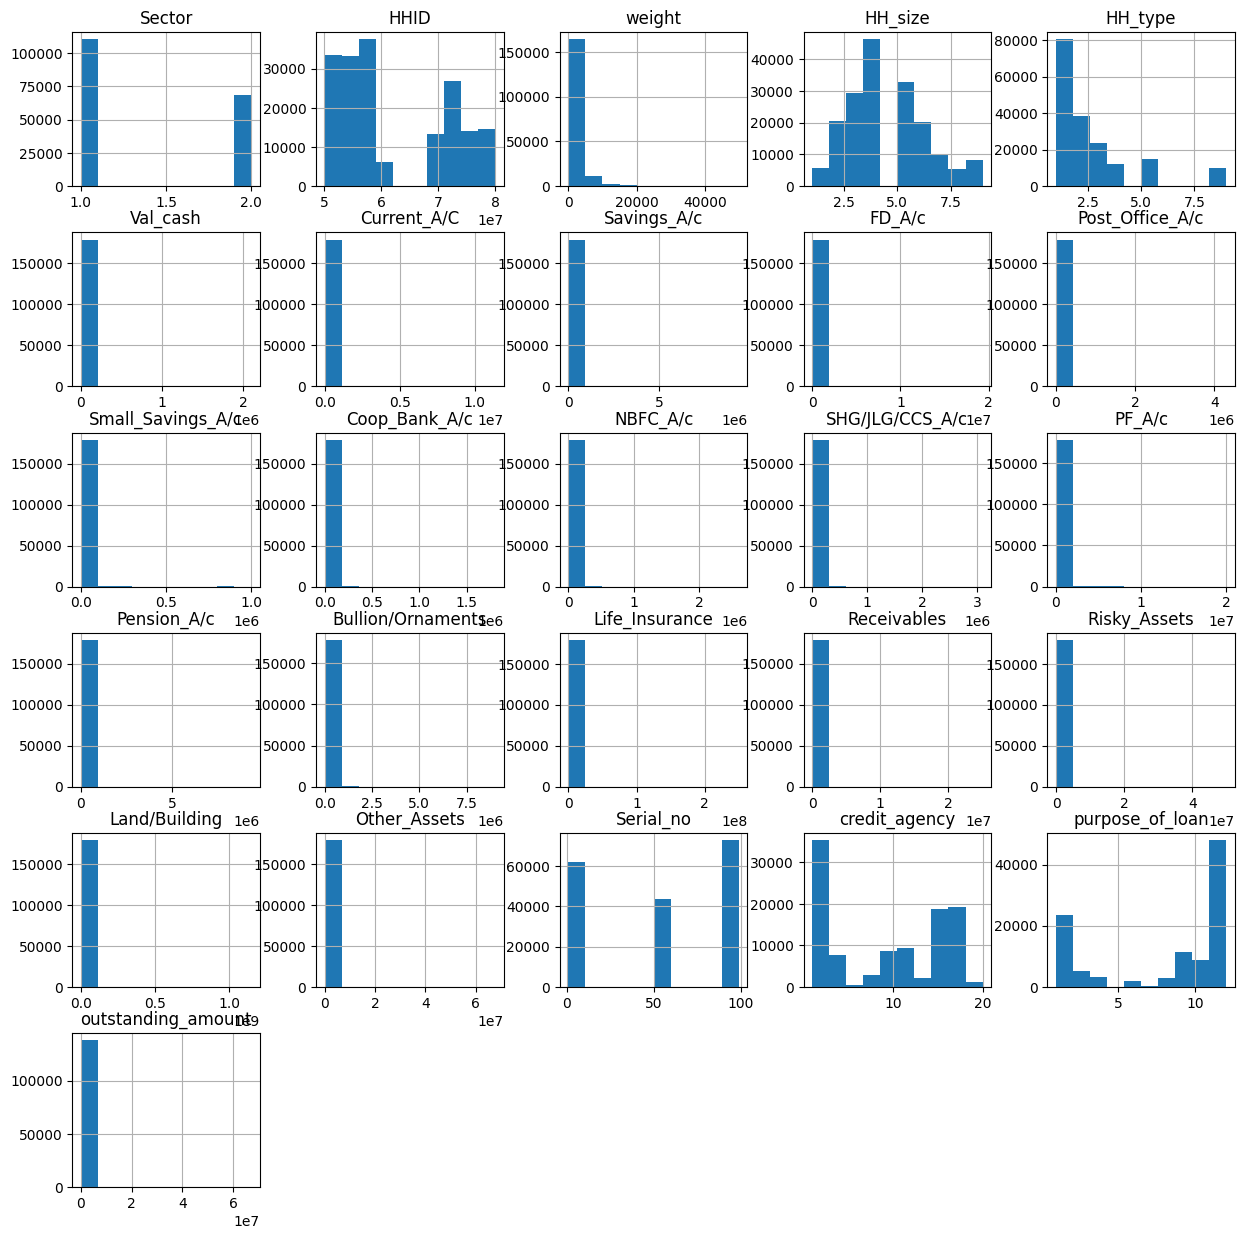

In [40]:
df.hist(figsize=(15,15))
plt.show()

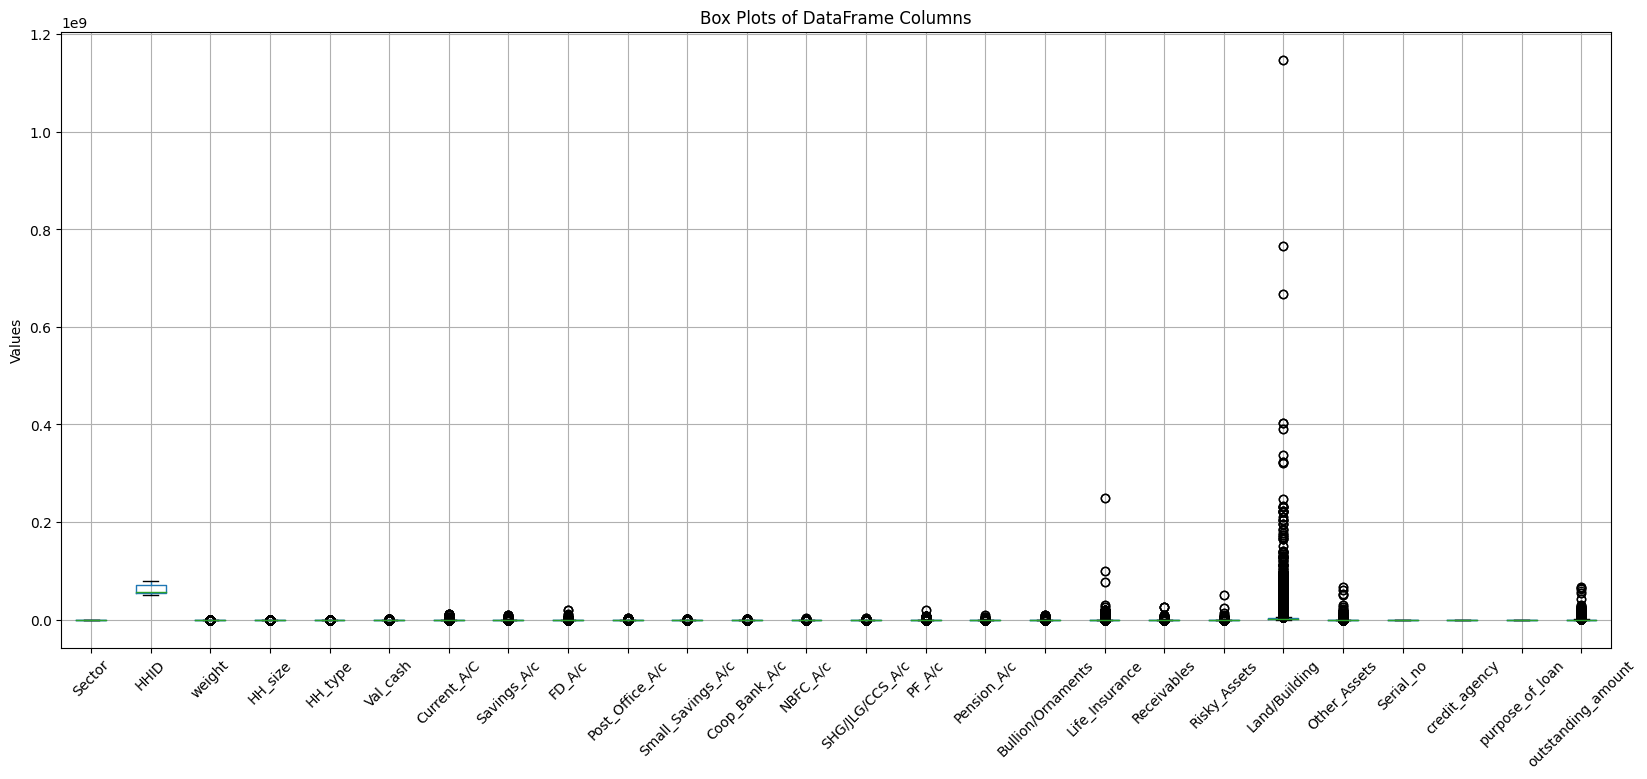

In [41]:
df.boxplot(figsize=(20, 8))
plt.title('Box Plots of DataFrame Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [42]:
df.columns

Index(['Sector', 'State', 'HHID', 'weight', 'HH_size', 'religion',
       'Social_group', 'HH_type', 'Val_cash', 'Current_A/C', 'Savings_A/c',
       'FD_A/c', 'Post_Office_A/c', 'Small_Savings_A/c', 'Coop_Bank_A/c',
       'NBFC_A/c', 'SHG/JLG/CCS_A/c', 'PF_A/c', 'Pension_A/c',
       'Bullion/Ornaments', 'Life_Insurance', 'Receivables', 'Risky_Assets',
       'Land/Building', 'Other_Assets', 'Serial_no', 'credit_agency',
       'purpose_of_loan', 'outstanding_amount'],
      dtype='object')

In [43]:
df['religion'].value_counts()

Hinduism        142297
Islam            20516
Christianity      9474
Others            6684
Name: religion, dtype: int64

In [19]:
religion = {'Zoroastrianism': 'Others', 'Sikhism': 'Others', 'Buddhism': 'Others', 'Jainism': 'Others'}
df['religion'] = df['religion'].replace(religion)

In [44]:
df['religion'].value_counts()

Hinduism        142297
Islam            20516
Christianity      9474
Others            6684
Name: religion, dtype: int64

In [45]:
df['HH_size'].value_counts()

4    46270
5    32911
3    29259
2    20607
6    20265
7    10101
9     8372
1     5654
8     5532
Name: HH_size, dtype: int64

In [46]:
HH_size = {10: 9, 11: 9,
    12: 9, 13: 9, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9,
    19: 9, 20: 9, 21: 9, 22: 9, 23: 9, 24: 9, 25: 9, 28: 9, 30: 9
}
df['HH_size'] = df['HH_size'].replace(HH_size)

In [47]:
df['HH_size'].value_counts()

4    46270
5    32911
3    29259
2    20607
6    20265
7    10101
9     8372
1     5654
8     5532
Name: HH_size, dtype: int64

In [48]:
df['purpose_of_loan'].value_counts()

12    32844
11    15138
2     14234
9     11535
1      9379
10     8840
3      5264
4      3345
8      3061
6      2090
7       262
5        41
Name: purpose_of_loan, dtype: Int64

In [49]:
purpose_of_loan = {5: 9,7: 9 }
df['purpose_of_loan'] = df['purpose_of_loan'].replace(purpose_of_loan)

In [50]:
df['purpose_of_loan'].value_counts()

12    32844
11    15138
2     14234
9     11838
1      9379
10     8840
3      5264
4      3345
8      3061
6      2090
Name: purpose_of_loan, dtype: Int64

In [51]:
df['credit_agency'].value_counts()

1     31359
18    18546
16    15522
11     8158
10     5371
3      4865
2      3957
15     3293
9      3279
4      2883
8      2815
12     1244
14     1081
13     1067
20      758
17      669
19      374
5       370
7       145
6        88
Name: credit_agency, dtype: Int64

In [52]:
credit_agency = {5: 9, 6: 9,7: 9, 12: 9, 13: 9, 14: 9, 17: 9, 19: 9, 20: 9}
df['credit_agency'] = df['credit_agency'].replace(credit_agency)

In [53]:
df['credit_agency'].value_counts()

1     31359
18    18546
16    15522
9      9075
11     8158
10     5371
3      4865
2      3957
15     3293
4      2883
8      2815
Name: credit_agency, dtype: Int64

In [54]:
df['outstanding_amount'].value_counts()

0         12032
50000      2702
20000      2274
10000      2152
100000     1703
          ...  
5274          1
425518        1
100440        1
31518         1
234600        1
Name: outstanding_amount, Length: 22732, dtype: Int64

In [55]:
df=df.fillna(0)

In [56]:
df.describe()

,Sector,HHID,weight,HH_size,HH_type,Val_cash,Current_A/C,Savings_A/c,FD_A/c,Post_Office_A/c,...,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount
count,178971.000000,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,...,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,178971.000000,178971.0,178971.0,178971.0
mean,1.384297,6.219726e+07,1595.086929,4.448659,2.446195,4.167685e+03,4.312092e+03,2.669937e+04,6.820860e+03,1.834829e+03,...,7.590993e+04,1.076277e+05,3.307865e+03,2.699755e+03,2.417837e+06,1.280942e+05,53.333205,5.278051,4.803208,187438.083544
std,0.486430,9.781287e+06,2820.518394,1.875071,2.013674,1.388502e+04,9.994550e+04,1.183214e+05,1.305352e+05,2.588659e+04,...,1.528223e+05,1.067982e+06,1.550991e+05,2.015998e+05,8.376181e+06,5.624540e+05,42.352399,6.815881,5.13192,775513.239106
min,1.000000,5.003010e+07,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000,0.0,0.0,0.0
25%,1.000000,5.427550e+07,190.500000,3.000000,1.000000,7.500000e+02,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,...,8.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.126000e+05,4.600000e+03,1.000000,0.0,0.0,0.0
50%,1.000000,5.734640e+07,514.250000,4.000000,2.000000,2.000000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,...,3.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+05,3.500000e+04,51.000000,1.0,2.0,35000.0
75%,2.000000,7.187710e+07,1707.750000,5.000000,3.000000,4.400000e+03,0.000000e+00,1.800000e+04,0.000000e+00,0.000000e+00,...,9.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+06,8.999000e+04,99.000000,11.0,11.0,126377.0
max,2.000000,7.999950e+07,49858.500000,9.000000,9.000000,2.100000e+06,1.135000e+07,9.400000e+06,1.930000e+07,4.300000e+06,...,9.000000e+06,2.500000e+08,2.500000e+07,5.000000e+07,1.147950e+09,6.777500e+07,99.000000,18.0,12.0,67200000.0


In [57]:
df.head()

,Sector,State,HHID,weight,HH_size,religion,Social_group,HH_type,Val_cash,Current_A/C,...,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount
0,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,51,18,12,0
1,1,Jammu & Kashmir,53335201,310.0,5,Islam,Other,1,7500,0,...,1500,0,0,0,1224000,64000,99,0,0,0
2,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,51,18,10,5000
3,1,Jammu & Kashmir,53335501,310.0,7,Islam,Other,1,2500,0,...,1800,100000,0,0,1029500,51850,99,0,0,5000
4,1,Jammu & Kashmir,53335502,310.0,1,Islam,Other,1,3000,0,...,0,0,0,0,992500,29060,51,18,12,3500


In [82]:
# import numpy as np
# from google.colab import autoviz

# def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
#   from matplotlib import pyplot as plt
#   import seaborn as sns
#   figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
#   plt.figure(figsize=figsize)
#   sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
#   sns.despine(top=True, right=True, bottom=True, left=True)
#   return autoviz.MplChart.from_current_mpl_state()

# chart = violin_plot(df, *['Social_group', 'purpose_of_loan'], **{'inner': 'stick'})
# chart

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178971 entries, 0 to 178970
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Sector              178971 non-null  int64  
 1   State               178971 non-null  object 
 2   HHID                178971 non-null  int64  
 3   weight              178971 non-null  float64
 4   HH_size             178971 non-null  int64  
 5   religion            178971 non-null  object 
 6   Social_group        178971 non-null  object 
 7   HH_type             178971 non-null  int64  
 8   Val_cash            178971 non-null  int64  
 9   Current_A/C         178971 non-null  int64  
 10  Savings_A/c         178971 non-null  int64  
 11  FD_A/c              178971 non-null  int64  
 12  Post_Office_A/c     178971 non-null  int64  
 13  Small_Savings_A/c   178971 non-null  int64  
 14  Coop_Bank_A/c       178971 non-null  int64  
 15  NBFC_A/c            178971 non-nul

In [4]:
df.to_csv('cleaned_data.csv', index=False)

In [2]:
df1= pd.read_csv('cleaned_data.csv')

In [66]:
df.describe()

,Sector,HHID,weight,HH_size,HH_type,Val_cash,Current_A/C,Savings_A/c,FD_A/c,Post_Office_A/c,...,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount
count,178971.000000,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,...,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,178971.000000,178971.0,178971.0,178971.0
mean,1.384297,6.219726e+07,1595.086929,4.448659,2.446195,4.167685e+03,4.312092e+03,2.669937e+04,6.820860e+03,1.834829e+03,...,7.590993e+04,1.076277e+05,3.307865e+03,2.699755e+03,2.417837e+06,1.280942e+05,53.333205,5.278051,4.803208,187438.083544
std,0.486430,9.781287e+06,2820.518394,1.875071,2.013674,1.388502e+04,9.994550e+04,1.183214e+05,1.305352e+05,2.588659e+04,...,1.528223e+05,1.067982e+06,1.550991e+05,2.015998e+05,8.376181e+06,5.624540e+05,42.352399,6.815881,5.13192,775513.239106
min,1.000000,5.003010e+07,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000,0.0,0.0,0.0
25%,1.000000,5.427550e+07,190.500000,3.000000,1.000000,7.500000e+02,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,...,8.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.126000e+05,4.600000e+03,1.000000,0.0,0.0,0.0
50%,1.000000,5.734640e+07,514.250000,4.000000,2.000000,2.000000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,...,3.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+05,3.500000e+04,51.000000,1.0,2.0,35000.0
75%,2.000000,7.187710e+07,1707.750000,5.000000,3.000000,4.400000e+03,0.000000e+00,1.800000e+04,0.000000e+00,0.000000e+00,...,9.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+06,8.999000e+04,99.000000,11.0,11.0,126377.0
max,2.000000,7.999950e+07,49858.500000,9.000000,9.000000,2.100000e+06,1.135000e+07,9.400000e+06,1.930000e+07,4.300000e+06,...,9.000000e+06,2.500000e+08,2.500000e+07,5.000000e+07,1.147950e+09,6.777500e+07,99.000000,18.0,12.0,67200000.0


In [3]:
df1.describe()

,Sector,HHID,weight,HH_size,HH_type,Val_cash,Current_A/C,Savings_A/c,FD_A/c,Post_Office_A/c,...,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount
count,178971.000000,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,...,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05
mean,1.384297,6.219726e+07,1595.086929,4.448659,2.446195,4.167685e+03,4.312092e+03,2.669937e+04,6.820860e+03,1.834829e+03,...,7.590993e+04,1.076277e+05,3.307865e+03,2.699755e+03,2.417837e+06,1.280942e+05,53.333205,5.278051,4.803208,1.874381e+05
std,0.486430,9.781287e+06,2820.518394,1.875071,2.013674,1.388502e+04,9.994550e+04,1.183214e+05,1.305352e+05,2.588659e+04,...,1.528223e+05,1.067982e+06,1.550991e+05,2.015998e+05,8.376181e+06,5.624540e+05,42.352399,6.815881,5.131920,7.755132e+05
min,1.000000,5.003010e+07,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,5.427550e+07,190.500000,3.000000,1.000000,7.500000e+02,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,...,8.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.126000e+05,4.600000e+03,1.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,5.734640e+07,514.250000,4.000000,2.000000,2.000000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,...,3.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+05,3.500000e+04,51.000000,1.000000,2.000000,3.500000e+04
75%,2.000000,7.187710e+07,1707.750000,5.000000,3.000000,4.400000e+03,0.000000e+00,1.800000e+04,0.000000e+00,0.000000e+00,...,9.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+06,8.999000e+04,99.000000,11.000000,11.000000,1.263770e+05
max,2.000000,7.999950e+07,49858.500000,9.000000,9.000000,2.100000e+06,1.135000e+07,9.400000e+06,1.930000e+07,4.300000e+06,...,9.000000e+06,2.500000e+08,2.500000e+07,5.000000e+07,1.147950e+09,6.777500e+07,99.000000,18.000000,12.000000,6.720000e+07


# 1.	One of the main objectives of the financial inclusion movement in India has been to reduce the reliance of Indian households, especially of low-income households, on informal sources of credit like moneylenders, friends, relatives, etc. by providing them easy access to formal financial institutions like banks, microfinance institutions, etc. that can provide them loans, among other financial services. What does this data say about the success/failure/status of the mission in this regard, both overall and in the rural and urban areas respectively? Include graphical representations of the regional variations on this front.




<Figure size 1200x1200 with 0 Axes>

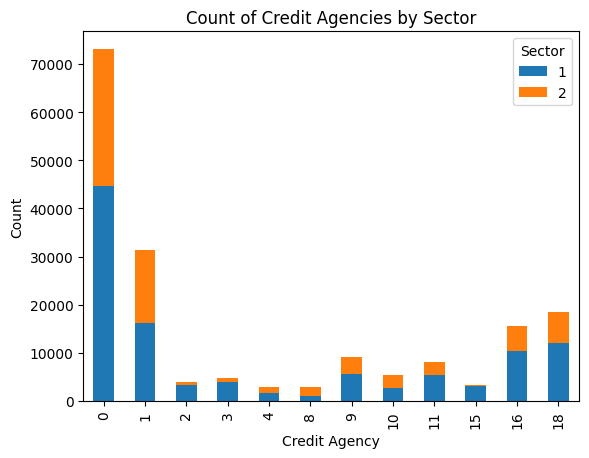

In [78]:
plt.figure(figsize=(12, 12))
df.groupby([ 'credit_agency','Sector']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Count of Credit Agencies by Sector')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.legend(title='Sector', loc='upper right')
plt.show()

<Figure size 1200x1200 with 0 Axes>

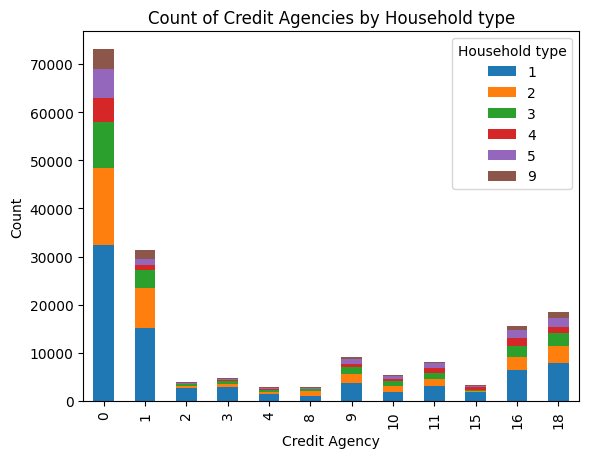

In [77]:
plt.figure(figsize=(12, 12))
df.groupby([ 'credit_agency','HH_type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Count of Credit Agencies by Household type')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.legend(title='Household type', loc='upper right')
plt.show()

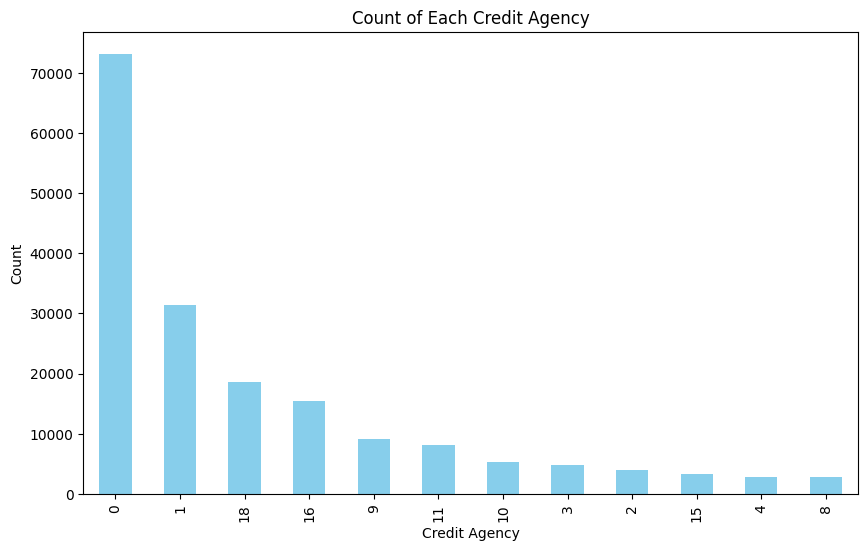

In [69]:
credit_agency_counts = df['credit_agency'].value_counts()
plt.figure(figsize=(10, 6))
credit_agency_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Credit Agency')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

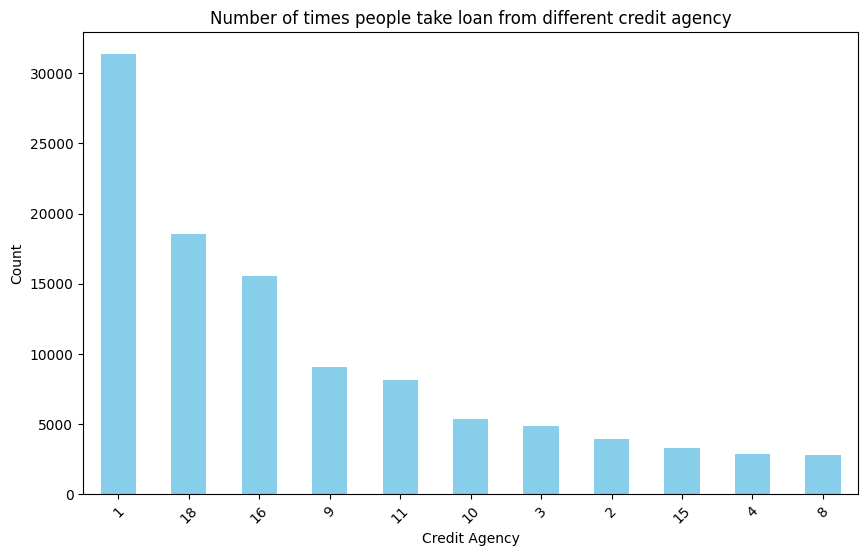

In [71]:
filtered_df = df[df['credit_agency'] != 0]
plt.figure(figsize=(10, 6))
filtered_df['credit_agency'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of times people take loan from different credit agency')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

<Figure size 1200x600 with 0 Axes>

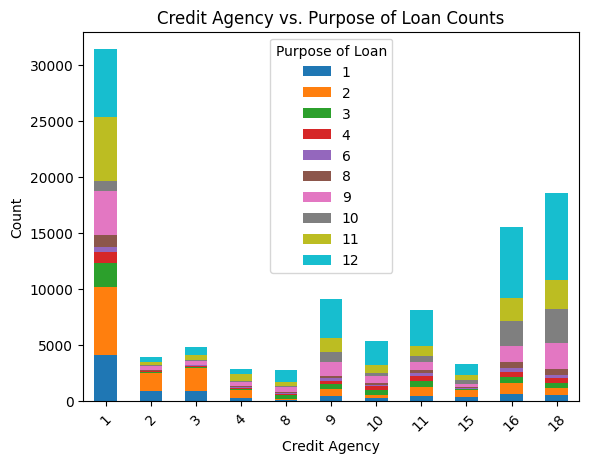

In [72]:
filtered_df = df[df['credit_agency'] != 0]

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
grouped_data = filtered_df.groupby(['credit_agency', 'purpose_of_loan']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Credit Agency vs. Purpose of Loan Counts')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Purpose of Loan')
plt.show()

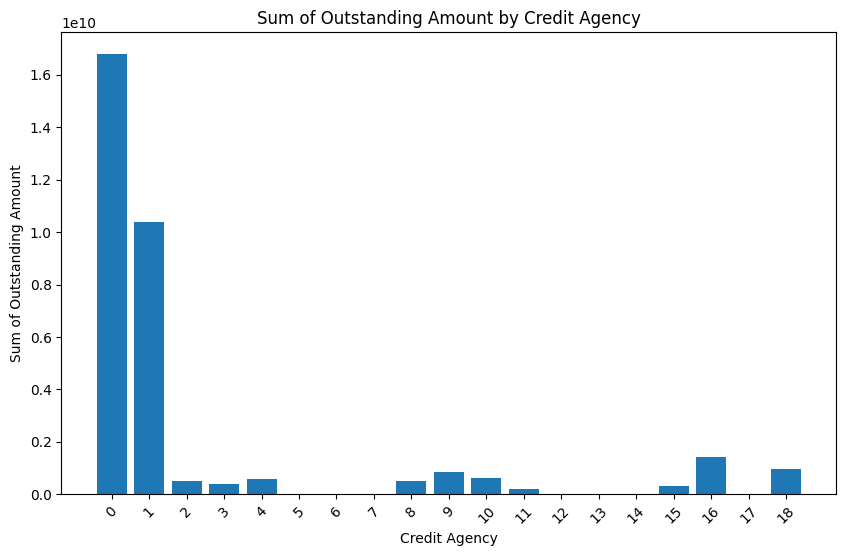

In [99]:
sum_by_credit_agency = df.groupby('credit_agency')['outstanding_amount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_credit_agency['credit_agency'], sum_by_credit_agency['outstanding_amount'])
plt.title('Sum of Outstanding Amount by Credit Agency')
plt.xlabel('Credit Agency')
plt.ylabel('Sum of Outstanding Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.show()

In [7]:
df1.columns

Index(['Sector', 'State', 'HHID', 'weight', 'HH_size', 'religion',
       'Social_group', 'HH_type', 'Val_cash', 'Current_A/C', 'Savings_A/c',
       'FD_A/c', 'Post_Office_A/c', 'Small_Savings_A/c', 'Coop_Bank_A/c',
       'NBFC_A/c', 'SHG/JLG/CCS_A/c', 'PF_A/c', 'Pension_A/c',
       'Bullion/Ornaments', 'Life_Insurance', 'Receivables', 'Risky_Assets',
       'Land/Building', 'Other_Assets', 'Serial_no', 'credit_agency',
       'purpose_of_loan', 'outstanding_amount'],
      dtype='object')

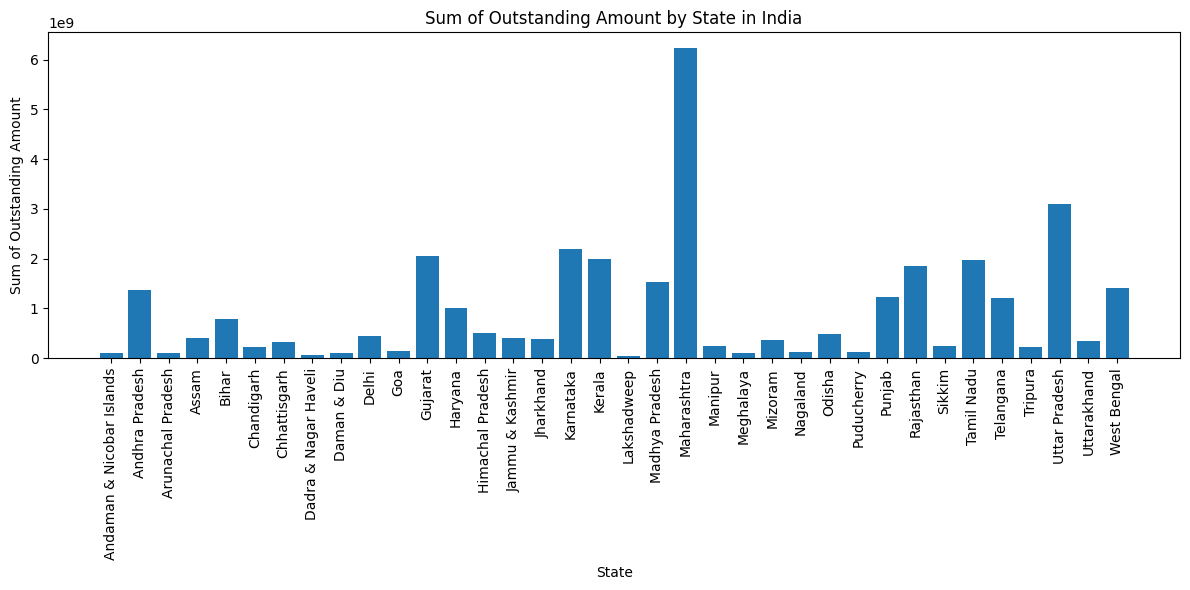

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Group the data by 'States' and calculate the sum of 'outstanding_amount'
sum_by_states = df1.groupby('State')['outstanding_amount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sum_by_states['State'], sum_by_states['outstanding_amount'])
plt.title('Sum of Outstanding Amount by State in India')
plt.xlabel('State')
plt.ylabel('Sum of Outstanding Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# 2.	It is also important to find out the amount of outstanding debt held by Indian households, to get a sense of their own financial health as well as that of our macroeconomy. So, what is the average value of debt held by Indian households? Beyond just the amount of debt, it is also important to know the purposes for which these loans have been taken, as loans taken for different purposes have different implications from the point of view of households as well as the larger macroeconomy. For example, loans taken for investing in business or to buy durables may give returns or cut costs for households eventually, whereas loans taken to fund essential expenditure on food or for repaying of existing loans may not do so. Therefore, it becomes important to understand the purposes for which households have taken loans. Accordingly, out of the outstanding loan amounts of households, what is the break-up of different purposes for which they have taken loans? Does this break-up differ in rural and urban areas? How does it differ for different classes of households, when you classify them into quintile or decile groups based on their total asset value? (Basically, do poor and rich households take loans for the same/different purposes?) Visualise the data using appropriate graphs and explain your findings.

In [25]:
# Calculate the average outstanding amount and express it in thousands
average_outstanding_amount_in_thousands = df1['outstanding_amount'].mean() / 1000

print("Average Outstanding Amount (in Thousands):", average_outstanding_amount_in_thousands)


Average Outstanding Amount (in Thousands): 187.4380835442614


In [26]:
df1.shape

(178971, 29)

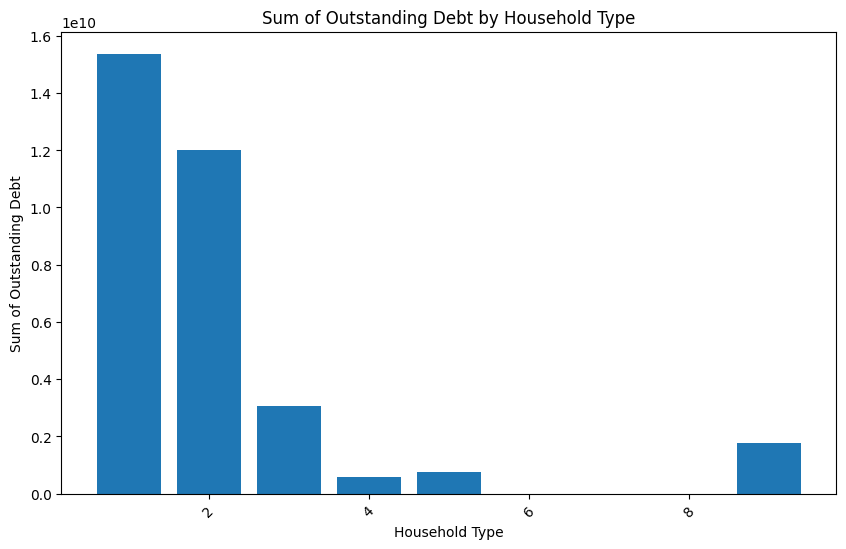

In [87]:
sum_by_hh_type = df.groupby('HH_type')['outstanding_amount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_hh_type['HH_type'], sum_by_hh_type['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Household Type')
plt.xlabel('Household Type')
plt.ylabel('Sum of Outstanding Debt')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [90]:
average_debt = df['outstanding_amount'].mean()

print(f"The average value of debt held by Indian households is: {average_debt:.2f}")

The average value of debt held by Indian households is: 187438.08


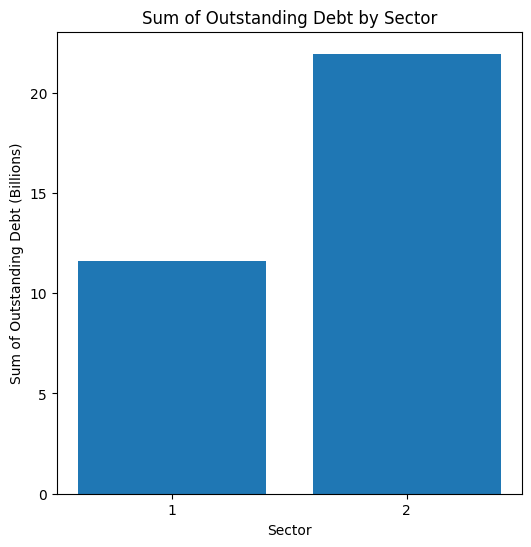

In [34]:
import matplotlib.pyplot as plt

# Group by 'Sector' and calculate the sum of 'outstanding_amount'
sum_by_sector = df1.groupby('Sector')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(sum_by_sector['Sector'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Sector')
plt.xlabel('Sector')
plt.ylabel('Sum of Outstanding Debt (Billions)')
plt.xticks([ 1, 2])
plt.show()

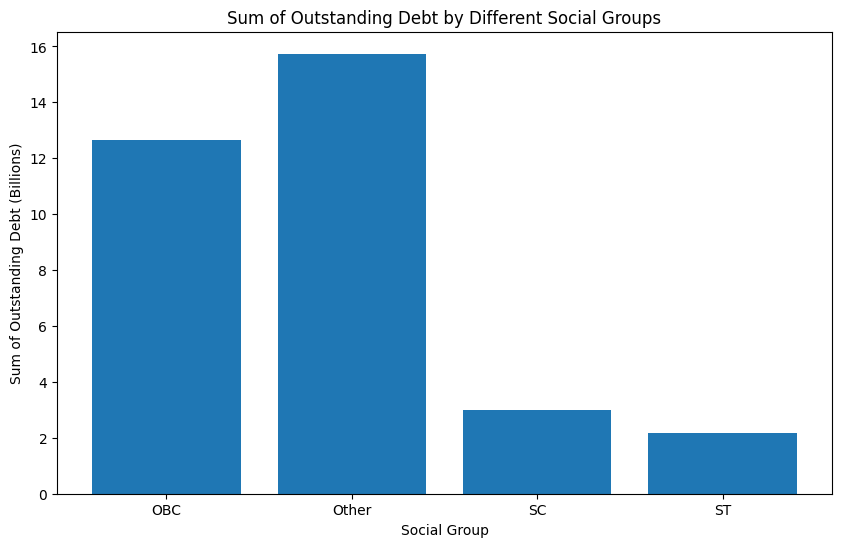

In [31]:
import matplotlib.pyplot as plt

# Group by 'Social_group' and calculate the sum of 'outstanding_amount'
sum_by_sector = df1.groupby('Social_group')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['Social_group'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Different Social Groups')
plt.xlabel('Social Group')
plt.ylabel('Sum of Outstanding Debt (Billions)')
plt.show()

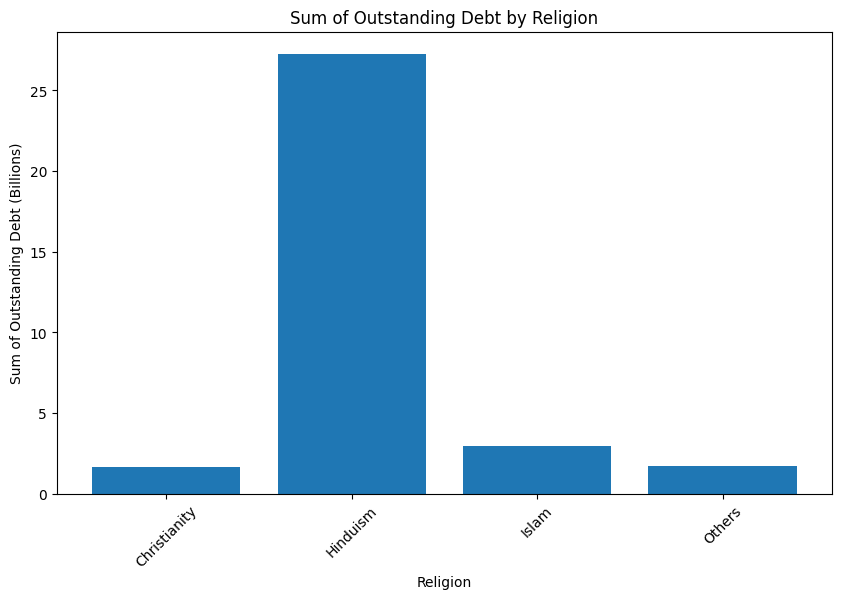

In [30]:
import matplotlib.pyplot as plt

# Group by 'religion' and calculate the sum of 'outstanding_amount'
sum_by_sector = df1.groupby('religion')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['religion'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Religion')
plt.xlabel('Religion')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()


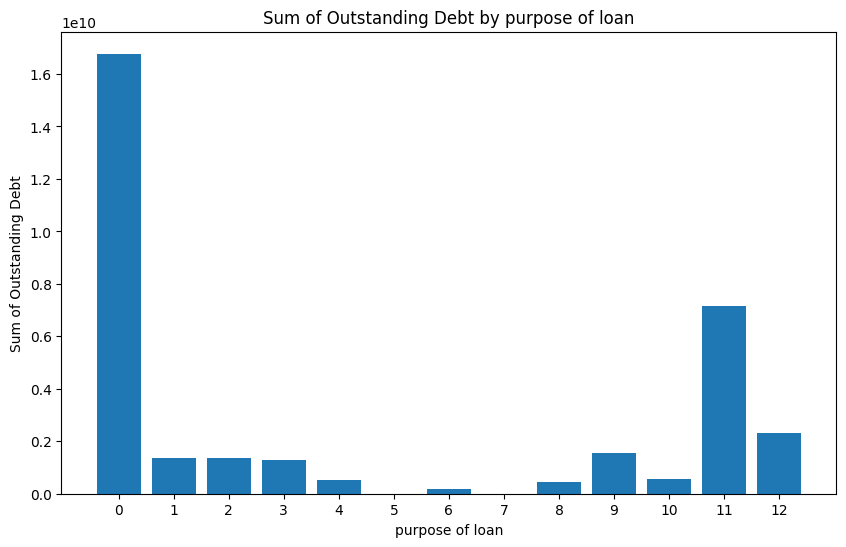

In [103]:
sum_by_sector = df.groupby('purpose_of_loan')['outstanding_amount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['purpose_of_loan'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by purpose of loan')
plt.xlabel('purpose of loan')
plt.ylabel('Sum of Outstanding Debt')

# Set the x-axis ticks to only include specific values (1 and 2)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12])

plt.show()

# 3.	Do households exhibit different preferences as to whom they will take a loan from, depending on the purpose for which they are taking the loan? For example, for housing improvements, do they usually prefer taking a loan from a bank, whereas, if someone at home suddenly falls sick and gets hospitalised, do they instead prefer a quick loan from a familiar moneylender in their neighbourhood? In this data, (how) does the preferred source of credit change for the different purposes for which loans are taken? In addition to the necessary table(s)/graph(s), you can feel free to briefly explain in 2-3 sentences, any of the differences observed.

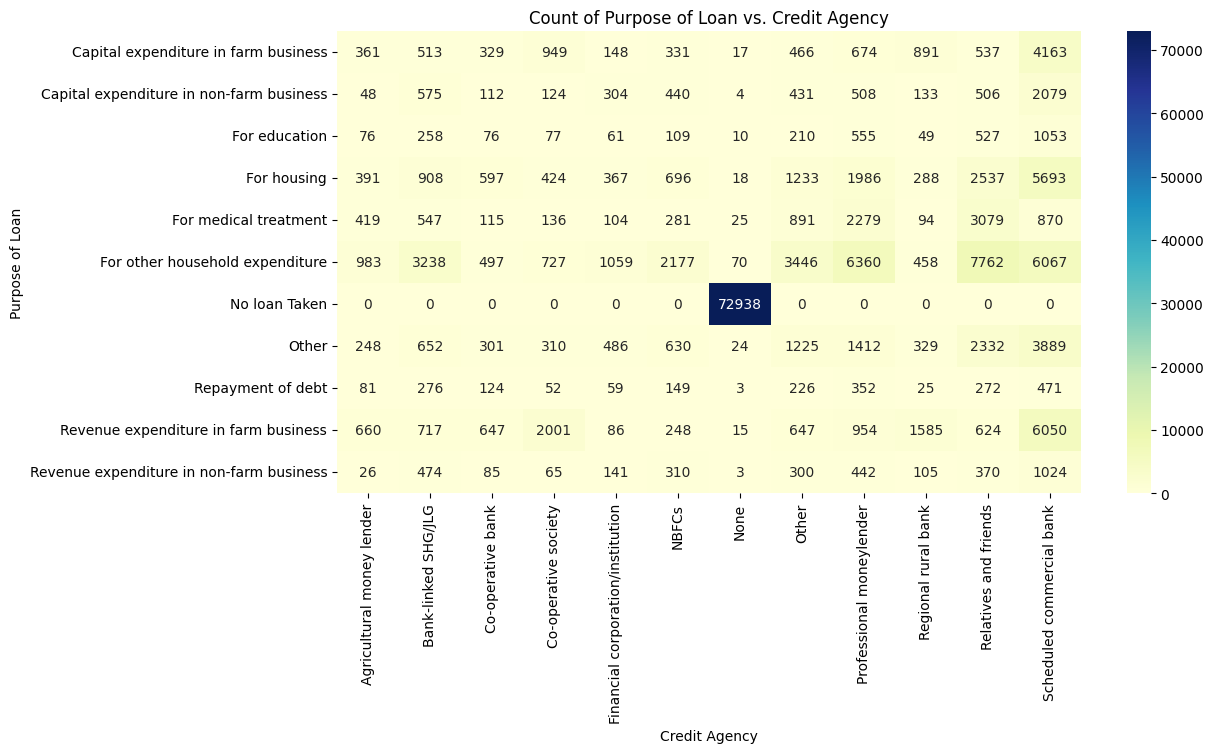

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by 'purpose_of_loan' and 'credit_agency' and counting occurrences
loan_count_by_agency = df1.groupby(['purpose_of_loan', 'credit_agency']).size().unstack(fill_value=0)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.heatmap(loan_count_by_agency, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of Purpose of Loan vs. Credit Agency')
plt.xlabel('Credit Agency')
plt.ylabel('Purpose of Loan')

# Show the plot
plt.show()


In [37]:
df1.columns

Index(['Sector', 'State', 'HHID', 'weight', 'HH_size', 'religion',
       'Social_group', 'HH_type', 'Val_cash', 'Current_A/C', 'Savings_A/c',
       'FD_A/c', 'Post_Office_A/c', 'Small_Savings_A/c', 'Coop_Bank_A/c',
       'NBFC_A/c', 'SHG/JLG/CCS_A/c', 'PF_A/c', 'Pension_A/c',
       'Bullion/Ornaments', 'Life_Insurance', 'Receivables', 'Risky_Assets',
       'Land/Building', 'Other_Assets', 'Serial_no', 'credit_agency',
       'purpose_of_loan', 'outstanding_amount'],
      dtype='object')

# 4.	One of the main concerns regarding the financial well-being of low-income households is to ensure that households are not over-indebted, that is, their burden of outstanding loan amount is not disproportionate to their repayment capacity. The repayment capacity is usually measured by the income of the household and/or the amount of assets it owns. Using the information available in all three datasets,

a.	What metric would you use/construct to measure the repayment capacity of a household?
b.	What metric would you use/construct to identify whether a household is overindebted?
c.	By using/constructing those metrics, did you spot any households that have taken on more loans than they can repay, that is, did you find any over-indebted households?
d.	Based on this data, if you are asked by a financial service provider to give a list of factors that can potentially cause a household to become over-indebted, how would you go about tackling the question and preparing a list? Please explain your approach in detail and justify why it is appropriate.

#1, 2. Ans
Measuring the repayment capacity of a household is crucial for lenders and financial institutions to assess the household's ability to repay a loan. From the given data we can construct a metric called the "Debt Service Ratio (DSR)" to gauge this capacity. The DSR compares a household's debt obligations (outstanding loan amounts) to its income or financial assets. It's typically expressed as a percentage and helps assess whether the household can comfortably meet its debt payments.

*Debt Service Ratio (DSR) = (Total Outstanding Loan Amount) / (Total Financial Assets or Income)*

DSR < 30%: Generally considered good; the household has a low debt burden relative to its assets or income.

30% ≤ DSR ≤ 40%: Indicates moderate risk; the household is managing its debt but should be cautious about taking on additional debt.

DSR > 40%: Suggests a high debt burden; the household may struggle to meet its debt obligations, indicating higher risk.
**bold text**

#4 Ans
Over-indebtedness occurs when a household's debt burden becomes unsustainable, leading to financial distress. Common signs of over-indebtedness include missed payments, borrowing to repay existing debt, and reduced ability to meet basic needs.

Based on the data columns, consider factors that can contribute to over-indebtedness. These factors may include:

High Outstanding Loan Amounts: Households with substantial outstanding loans across various categories (e.g., Val_cash, FD_A/c) may face difficulty managing repayments.

Multiple Loans: Households with loans from multiple sources (e.g., banks, cooperatives, NBFCs) may struggle to keep track of repayment obligations.

High-Risk Assets: Ownership of high-risk assets (e.g., risky assets, bullion/ornaments) may indicate a tendency to invest in speculative or illiquid assets, potentially diverting funds from debt servicing.

Low Financial Assets: Households with minimal financial assets (e.g., Val_cash, Savings_A/c) may rely on borrowing to cover expenses.

Purpose of Loans: Certain loan purposes (e.g., consumption loans) may be riskier than others (e.g., home loans) and can contribute to over-indebtedness.

Credit Agency: A history of borrowing from informal credit agencies or moneylenders may indicate limited access to formal financial institutions, potentially leading to higher-cost loans.

Income Level: Lower income levels may make it challenging for households to manage debt effectively.



In [4]:
# Define the columns representing different types of loans
income_columns = [
    'Val_cash', 'Current_A/C', 'Savings_A/c', 'FD_A/c', 'Post_Office_A/c',
    'Small_Savings_A/c', 'Coop_Bank_A/c', 'NBFC_A/c', 'SHG/JLG/CCS_A/c',
    'PF_A/c', 'Pension_A/c', 'Bullion/Ornaments', 'Life_Insurance',
    'Receivables', 'Risky_Assets', 'Land/Building', 'Other_Assets'
]

# Calculate the total outstanding loan amount for each household
df1['Total_income'] = df1[income_columns].sum(axis=1)

# Calculate the Debt Service Ratio (DSR) as the ratio of outstanding loans to income
df1['DSR'] = df1['outstanding_amount'] / df1['Total_income']

# Now, df1 contains a new column 'DSR' representing the Debt Service Ratio


In [5]:
df1.describe()

,Sector,HHID,weight,HH_size,HH_type,Val_cash,Current_A/C,Savings_A/c,FD_A/c,Post_Office_A/c,...,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,credit_agency,purpose_of_loan,outstanding_amount,Total_income,DSR
count,178971.000000,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,...,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789600e+05
mean,1.384297,6.219726e+07,1595.086929,4.448659,2.446195,4.167685e+03,4.312092e+03,2.669937e+04,6.820860e+03,1.834829e+03,...,3.307865e+03,2.699755e+03,2.417837e+06,1.280942e+05,53.333205,5.278051,4.803208,1.874381e+05,2.813395e+06,inf
std,0.486430,9.781287e+06,2820.518394,1.875071,2.013674,1.388502e+04,9.994550e+04,1.183214e+05,1.305352e+05,2.588659e+04,...,1.550991e+05,2.015998e+05,8.376181e+06,5.624540e+05,42.352399,6.815881,5.131920,7.755132e+05,8.802971e+06,NaN
min,1.000000,5.003010e+07,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,5.427550e+07,190.500000,3.000000,1.000000,7.500000e+02,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.126000e+05,4.600000e+03,1.000000,0.000000,0.000000,0.000000e+00,4.588500e+05,0.000000e+00
50%,1.000000,5.734640e+07,514.250000,4.000000,2.000000,2.000000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,9.500000e+05,3.500000e+04,51.000000,1.000000,2.000000,3.500000e+04,1.191100e+06,2.932625e-02
75%,2.000000,7.187710e+07,1707.750000,5.000000,3.000000,4.400000e+03,0.000000e+00,1.800000e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.420000e+06,8.999000e+04,99.000000,11.000000,11.000000,1.263770e+05,2.857000e+06,1.114735e-01
max,2.000000,7.999950e+07,49858.500000,9.000000,9.000000,2.100000e+06,1.135000e+07,9.400000e+06,1.930000e+07,4.300000e+06,...,2.500000e+07,5.000000e+07,1.147950e+09,6.777500e+07,99.000000,18.000000,12.000000,6.720000e+07,1.148140e+09,inf


In [7]:
df1['DSR'].value_counts()

0.000000    52909
0.400000       17
inf            15
0.270270       13
2.500000       11
            ...  
0.060555        1
0.038558        1
0.031933        1
0.025440        1
0.210570        1
Name: DSR, Length: 82008, dtype: int64

In [8]:
df1['DSR'].describe

<bound method NDFrame.describe of 0         0.000000
1         0.000000
2         0.004214
3         0.004214
4         0.003410
            ...   
178966    0.090668
178967    0.119901
178968    0.210570
178969    0.000000
178970    0.000000
Name: DSR, Length: 178971, dtype: float64>

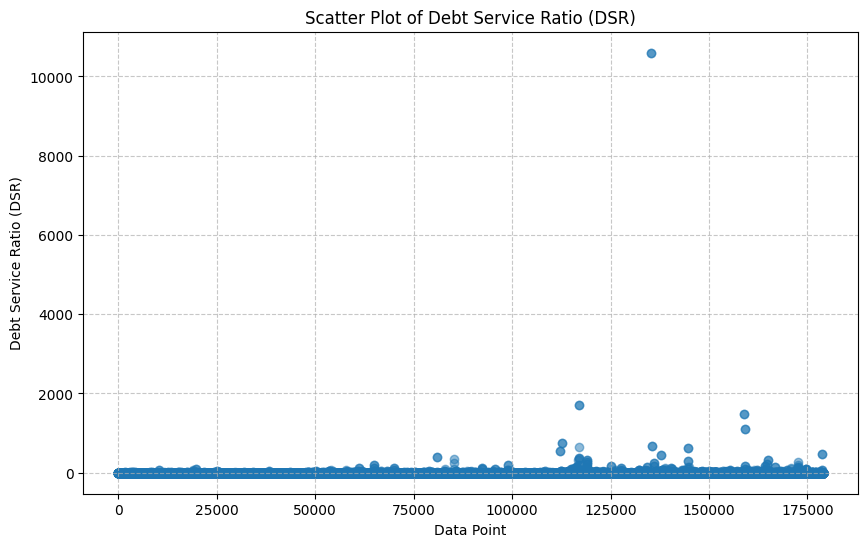

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Remove non-finite values (NaN and inf) from the DSR column
dsr_values = df1['DSR'].replace([np.inf, -np.inf], np.nan).dropna()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dsr_values)), dsr_values, alpha=0.5, marker='o')
plt.title('Scatter Plot of Debt Service Ratio (DSR)')
plt.xlabel('Data Point')
plt.ylabel('Debt Service Ratio (DSR)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

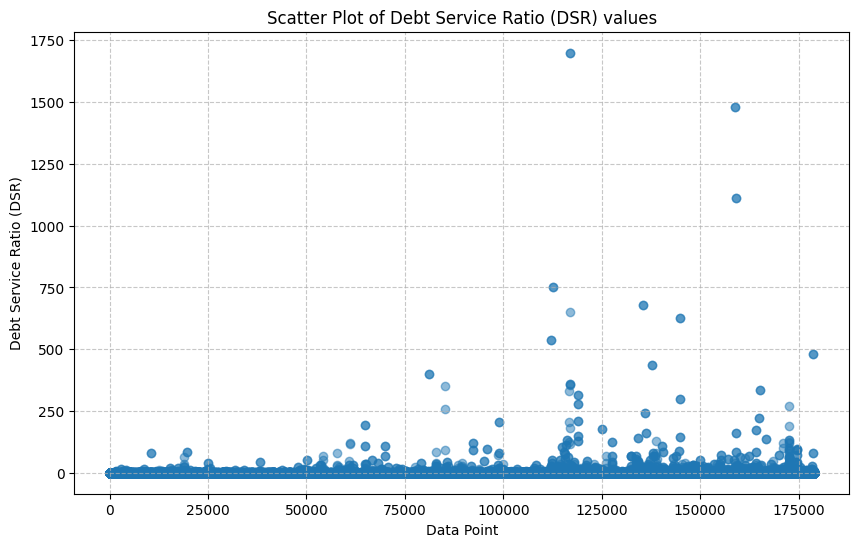

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Remove non-finite values (NaN and inf) from the DSR column
dsr_values = df1['DSR'].replace([np.inf, -np.inf], np.nan).dropna()

# Filter values less than or equal to 2000
dsr_values_filtered = dsr_values[dsr_values <= 2000]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dsr_values_filtered)), dsr_values_filtered, alpha=0.5, marker='o')
plt.title('Scatter Plot of Debt Service Ratio (DSR) values')
plt.xlabel('Data Point')
plt.ylabel('Debt Service Ratio (DSR)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


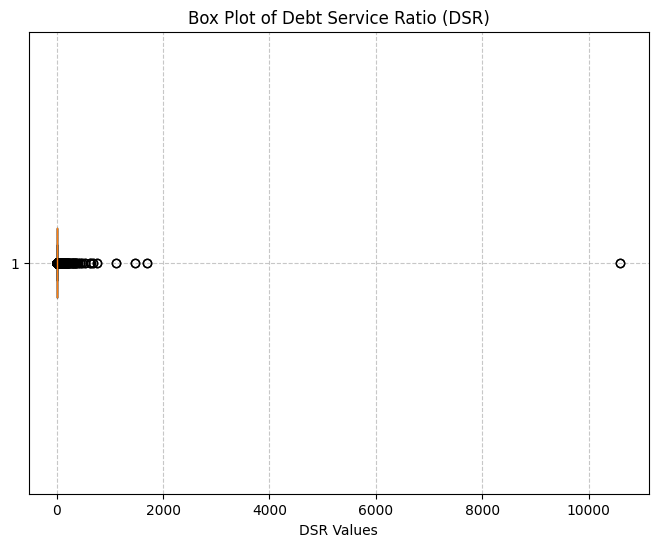

In [49]:
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df1['DSR'].dropna(), vert=False)
plt.title('Box Plot of Debt Service Ratio (DSR)')
plt.xlabel('DSR Values')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Renaming options of different variables

In [5]:
agency_mapping = {
    0: 'None',
    1: 'Scheduled commercial bank',
    2: 'Regional rural bank',
    3: 'Co-operative society',
    4: 'Co-operative bank',
    5: 'Insurance companies',
    6: 'Provident fund',
    7: 'Employer',
    8: 'Financial corporation/institution',
    10: 'NBFCs',
    11: 'Bank-linked SHG/JLG',
    12: 'Non-bank linked SHG/JLG',
    13: 'Other institutional agencies',
    14: 'Landlord',
    15: 'Agricultural money lender',
    16: 'Professional moneylender',
    17: 'Input supplier',
    18: 'Relatives and friends',
    19: 'Chit fund',
    20: 'Market commission agent/traders',
    9: 'Other'
}

# Replace the numeric codes with their corresponding labels
df1['credit_agency'] = df1['credit_agency'].replace(agency_mapping)

In [6]:
df1['credit_agency'].value_counts()

None                                 73127
Scheduled commercial bank            31359
Relatives and friends                18546
Professional moneylender             15522
Other                                 9075
Bank-linked SHG/JLG                   8158
NBFCs                                 5371
Co-operative society                  4865
Regional rural bank                   3957
Agricultural money lender             3293
Co-operative bank                     2883
Financial corporation/institution     2815
Name: credit_agency, dtype: int64

In [7]:
purpose_mapping = {
    0: 'No loan Taken',
    1: 'Capital expenditure in farm business',
    2: 'Revenue expenditure in farm business',
    3: 'Capital expenditure in non-farm business',
    4: 'Revenue expenditure in non-farm business',
    5: 'Expenditure on litigation',
    6: 'Repayment of debt',
    7: 'Financial investment expenditure',
    8: 'For education',
    10: 'For medical treatment',
    11: 'For housing',
    12: 'For other household expenditure',
    9: 'Other'
}

# Replace the numeric codes with their corresponding labels for 'purpose_of_loan'
df1['purpose_of_loan'] = df1['purpose_of_loan'].replace(purpose_mapping)

In [8]:
df1['purpose_of_loan'].value_counts()

No loan Taken                               72938
For other household expenditure             32844
For housing                                 15138
Revenue expenditure in farm business        14234
Other                                       11838
Capital expenditure in farm business         9379
For medical treatment                        8840
Capital expenditure in non-farm business     5264
Revenue expenditure in non-farm business     3345
For education                                3061
Repayment of debt                            2090
Name: purpose_of_loan, dtype: int64

<Figure size 1200x1200 with 0 Axes>

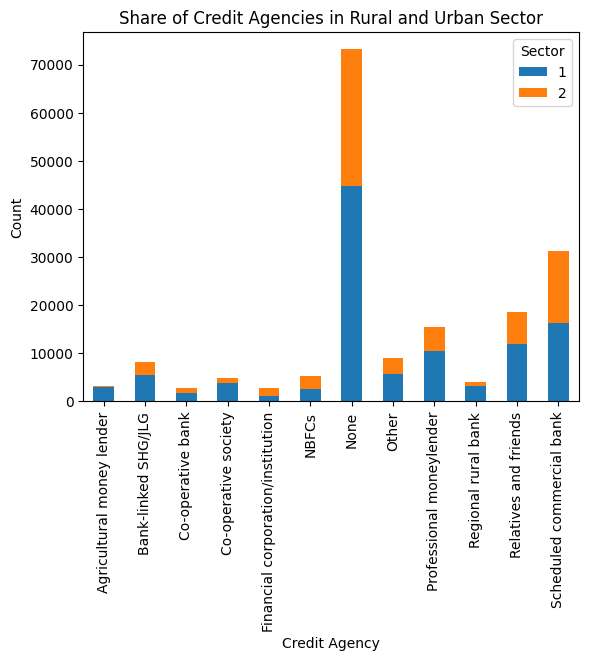

In [9]:
plt.figure(figsize=(12, 12))
df1.groupby([ 'credit_agency','Sector']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Share of Credit Agencies in Rural and Urban Sector')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.legend(title='Sector', loc='upper right')
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

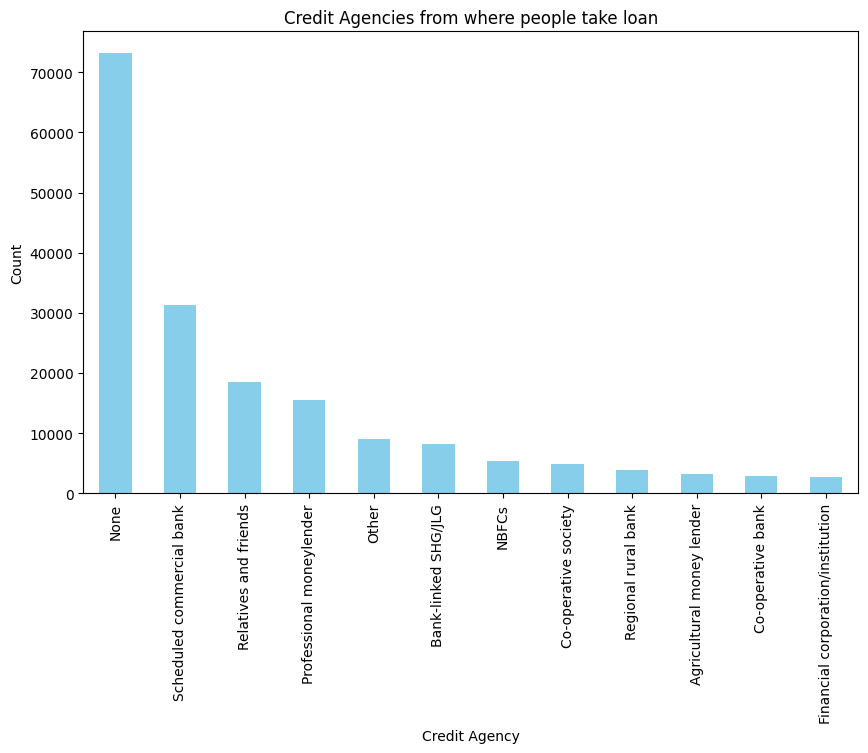

In [10]:
credit_agency_counts = df1['credit_agency'].value_counts()
plt.figure(figsize=(10, 6))
credit_agency_counts.plot(kind='bar', color='skyblue')
plt.title('Credit Agencies from where people take loan')
plt.xlabel('Credit Agency')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

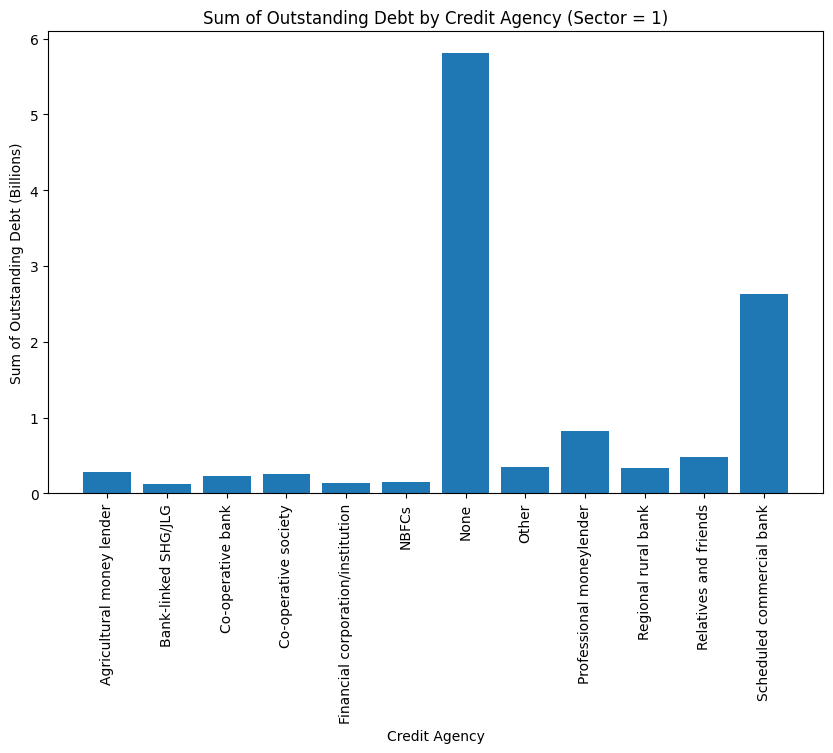

In [21]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Sector' is equal to 1
filtered_df = df1[df1['Sector'] == 1]

# Group by 'credit_agency' and calculate the sum of 'outstanding_amount'
sum_by_credit_agency = filtered_df.groupby('credit_agency')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_credit_agency['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_credit_agency['credit_agency'], sum_by_credit_agency['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Credit Agency (Sector = 1)')
plt.xlabel('Credit Agency')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()


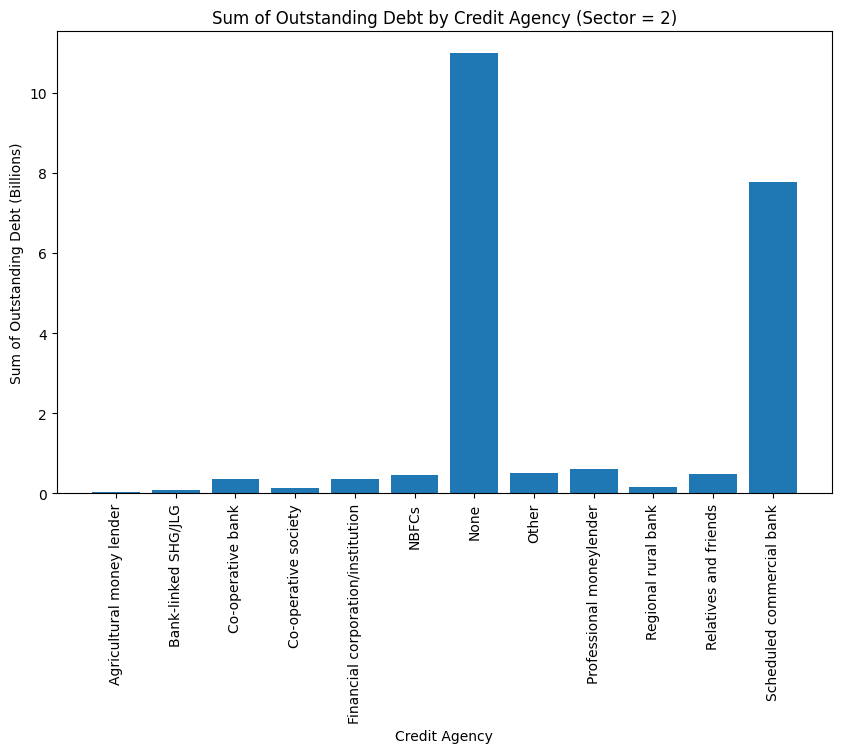

In [22]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Sector' is equal to 1
filtered_df = df1[df1['Sector'] == 2]

# Group by 'credit_agency' and calculate the sum of 'outstanding_amount'
sum_by_credit_agency = filtered_df.groupby('credit_agency')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_credit_agency['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_credit_agency['credit_agency'], sum_by_credit_agency['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Credit Agency (Sector = 2)')
plt.xlabel('Credit Agency')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()


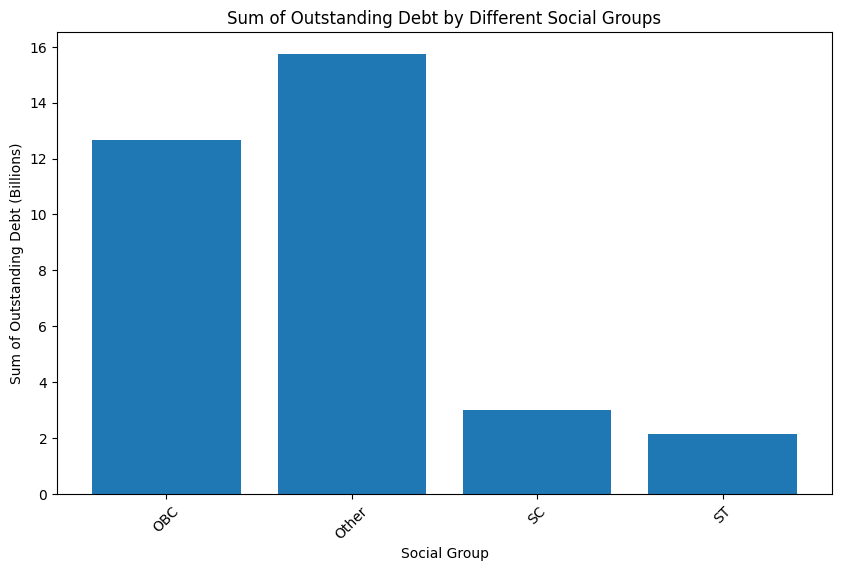

In [11]:
import matplotlib.pyplot as plt

# Group by 'Social_group' and calculate the sum of 'outstanding_amount'
sum_by_sector = df1.groupby('Social_group')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['Social_group'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Different Social Groups')
plt.xlabel('Social Group')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()


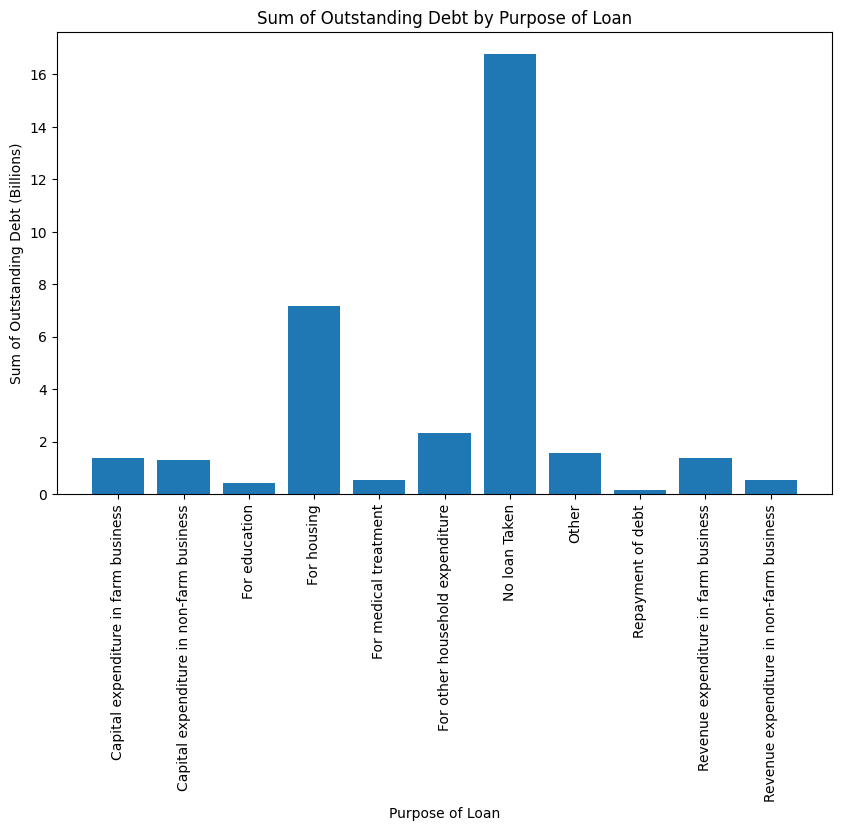

In [12]:
import matplotlib.pyplot as plt

# Group by 'purpose_of_loan' and calculate the sum of 'outstanding_amount'
sum_by_sector = df1.groupby('purpose_of_loan')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['purpose_of_loan'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()

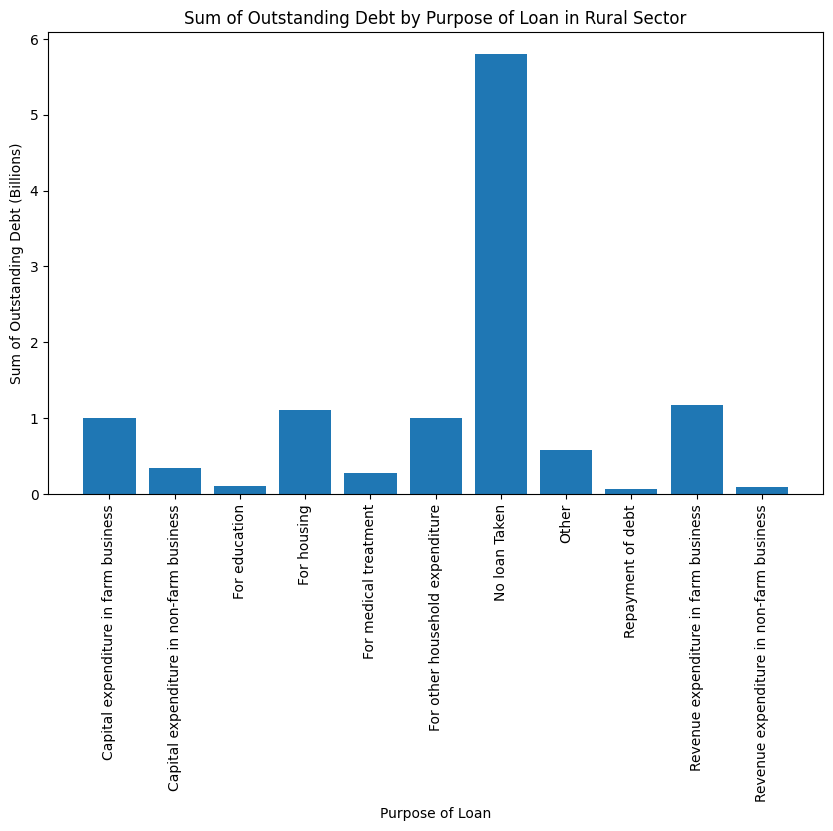

In [19]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Sector' is equal to 1
filtered_df = df1[df1['Sector'] == 1]

# Group by 'purpose_of_loan' and calculate the sum of 'outstanding_amount'
sum_by_sector = filtered_df.groupby('purpose_of_loan')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['purpose_of_loan'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Purpose of Loan in Rural Sector')
plt.xlabel('Purpose of Loan')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()

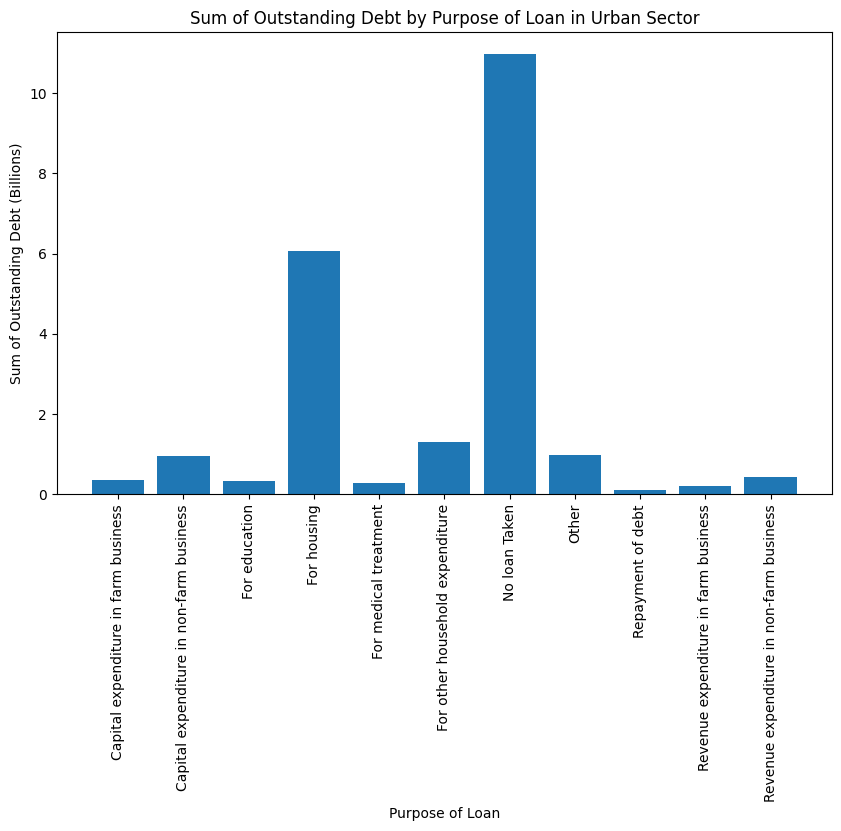

In [20]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Sector' is equal to 1
filtered_df = df1[df1['Sector'] == 2]

# Group by 'purpose_of_loan' and calculate the sum of 'outstanding_amount'
sum_by_sector = filtered_df.groupby('purpose_of_loan')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_sector['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_sector['purpose_of_loan'], sum_by_sector['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Purpose of Loan in Urban Sector')
plt.xlabel('Purpose of Loan')
plt.ylabel('Sum of Outstanding Debt (Billions)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()


In [13]:
df1.describe()

,Sector,HHID,weight,HH_size,HH_type,Val_cash,Current_A/C,Savings_A/c,FD_A/c,Post_Office_A/c,...,PF_A/c,Pension_A/c,Bullion/Ornaments,Life_Insurance,Receivables,Risky_Assets,Land/Building,Other_Assets,Serial_no,outstanding_amount
count,178971.000000,1.789710e+05,178971.000000,178971.000000,178971.000000,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,...,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,1.789710e+05,178971.000000,1.789710e+05
mean,1.384297,6.219726e+07,1595.086929,4.448659,2.446195,4.167685e+03,4.312092e+03,2.669937e+04,6.820860e+03,1.834829e+03,...,2.685068e+04,4.858032e+03,7.590993e+04,1.076277e+05,3.307865e+03,2.699755e+03,2.417837e+06,1.280942e+05,53.333205,1.874381e+05
std,0.486430,9.781287e+06,2820.518394,1.875071,2.013674,1.388502e+04,9.994550e+04,1.183214e+05,1.305352e+05,2.588659e+04,...,2.084543e+05,7.222884e+04,1.528223e+05,1.067982e+06,1.550991e+05,2.015998e+05,8.376181e+06,5.624540e+05,42.352399,7.755132e+05
min,1.000000,5.003010e+07,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.000000,5.427550e+07,190.500000,3.000000,1.000000,7.500000e+02,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,8.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.126000e+05,4.600000e+03,1.000000,0.000000e+00
50%,1.000000,5.734640e+07,514.250000,4.000000,2.000000,2.000000e+03,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+05,3.500000e+04,51.000000,3.500000e+04
75%,2.000000,7.187710e+07,1707.750000,5.000000,3.000000,4.400000e+03,0.000000e+00,1.800000e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,9.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+06,8.999000e+04,99.000000,1.263770e+05
max,2.000000,7.999950e+07,49858.500000,9.000000,9.000000,2.100000e+06,1.135000e+07,9.400000e+06,1.930000e+07,4.300000e+06,...,2.000000e+07,9.360000e+06,9.000000e+06,2.500000e+08,2.500000e+07,5.000000e+07,1.147950e+09,6.777500e+07,99.000000,6.720000e+07


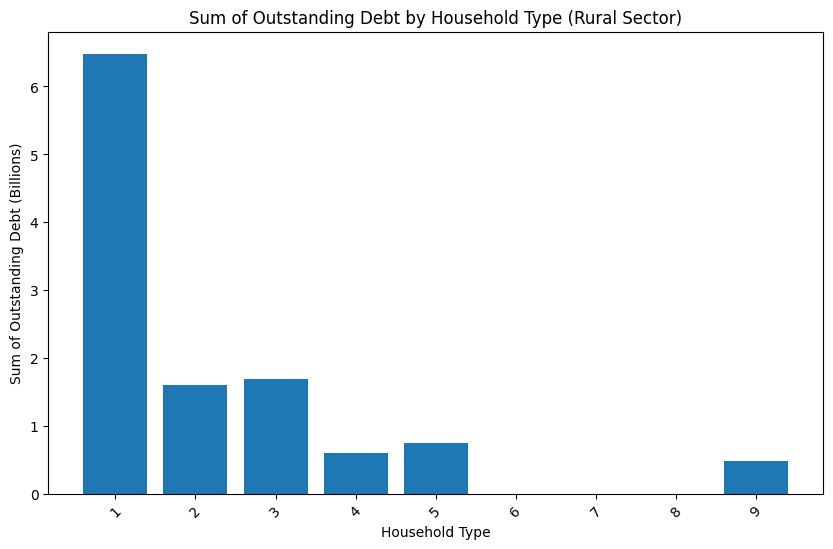

In [14]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where sector equals 1
df_sector_1 = df1[df1['Sector'] == 1]

# Group by 'HH_type' and calculate the sum of 'outstanding_amount'
sum_by_hh_type = df_sector_1.groupby('HH_type')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_hh_type['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_hh_type['HH_type'], sum_by_hh_type['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Household Type (Rural Sector)')
plt.xlabel('Household Type')
plt.ylabel('Sum of Outstanding Debt (Billions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xticks([1, 2,3,4,5,6,7,8,9])
plt.show()


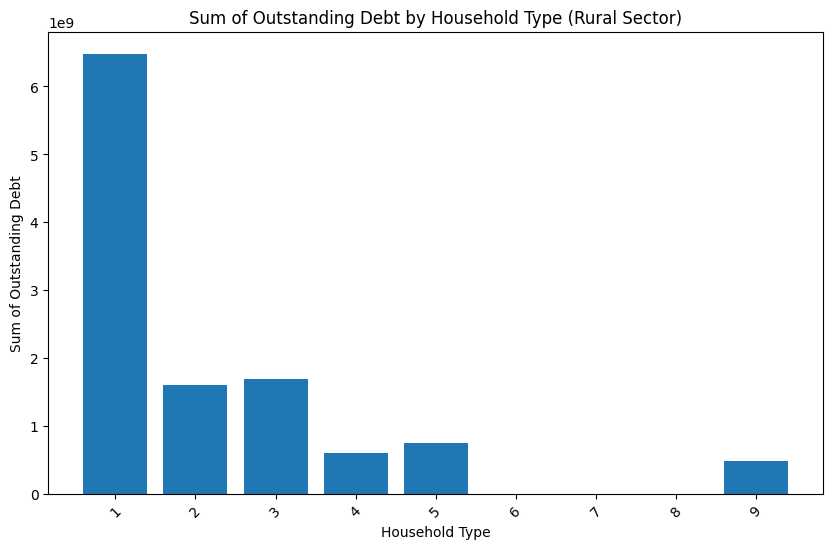

In [15]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where sector equals 1
df_sector_1 = df1[df1['Sector'] == 1]

# Group by 'HH_type' and calculate the sum of 'outstanding_amount'
sum_by_hh_type = df_sector_1.groupby('HH_type')['outstanding_amount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_hh_type['HH_type'], sum_by_hh_type['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Household Type (Rural Sector)')
plt.xlabel('Household Type')
plt.ylabel('Sum of Outstanding Debt')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xticks([1, 2,3,4,5,6,7,8,9])

plt.show()


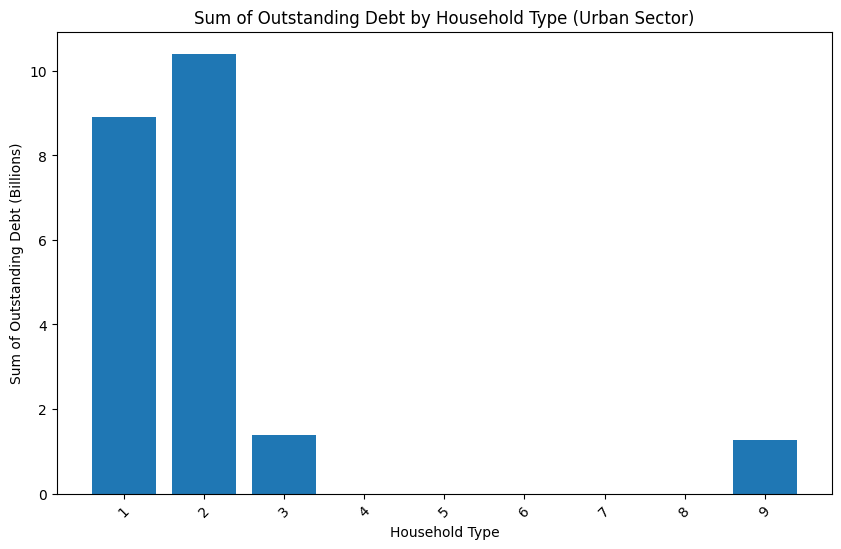

In [16]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where sector equals 1
df_sector_1 = df1[df1['Sector'] == 2]

# Group by 'HH_type' and calculate the sum of 'outstanding_amount'
sum_by_hh_type = df_sector_1.groupby('HH_type')['outstanding_amount'].sum().reset_index()

# Convert the 'outstanding_amount' to billions
sum_by_hh_type['outstanding_amount'] /= 1_000_000_000  # Divide by 1 billion

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_by_hh_type['HH_type'], sum_by_hh_type['outstanding_amount'])
plt.title('Sum of Outstanding Debt by Household Type (Urban Sector)')
plt.xlabel('Household Type')
plt.ylabel('Sum of Outstanding Debt (Billions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xticks([1, 2,3,4,5,6,7,8,9])
plt.show()
